# 7.2 Chunking

In [1]:
import nltk
#Noun Phrase Chunking or NP-Chunking, searching for chunks corresponding to individual
#noun phrases
#Rules: NP chunks are not allowed to contain other NP chunks

#Example of a simple regex-based NP-chunker
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
            ("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
#Defining a chunk grammar to indicate how sentences should be chunked.
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


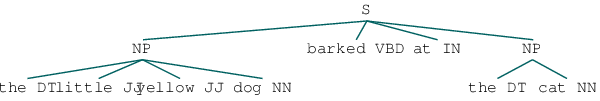

In [2]:
result

In [3]:
#The rules that make up a chunk grammar use tag patterns to describe sequences of 
#tagged words
#Another example:
sentence = "another/DT sharp/JJ dive/NN trade/NN figures/NNS any/DT new/JJ policy/NN measures/NNS earlier/JJR stages/NNS Panamanian/JJ dictator/NN Manuel/NNP Noriega/NNP"
sentence_words = [w for w in sentence.split()]
sentence_as_tags = [tuple([w.split("/")[0], w.split("/")[1]]) for w in sentence_words]
g = "NP: {<DT>?<JJ.*>*<NN.>*}"
cp = nltk.RegexpParser(g)
result = cp.parse(sentence_as_tags)
print(result)

(S
  (NP another/DT sharp/JJ)
  dive/NN
  trade/NN
  (NP figures/NNS)
  (NP any/DT new/JJ)
  policy/NN
  (NP measures/NNS)
  (NP earlier/JJR stages/NNS)
  (NP Panamanian/JJ)
  dictator/NN
  (NP Manuel/NNP Noriega/NNP))


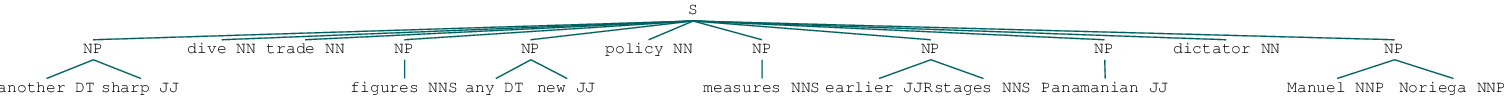

In [4]:
result

In [5]:
#Using multiple parsers
sentence_as_tags = [("Rapunzel", "NNP"), ("let", "VBD"), ("down", "RP"),
("her", "PP$"), ("long", "JJ"), ("golden", "JJ"), ("hair", "NN")]
g = r"""
    NP: {<DT|PP\$>?<JJ.*>*<NN.*>*}
    {<NNP>+}"""
cp = nltk.RegexpParser(g)
result = cp.parse(sentence_as_tags)
print(result)

(S
  (NP Rapunzel/NNP)
  let/VBD
  down/RP
  (NP her/PP$ long/JJ golden/JJ hair/NN))


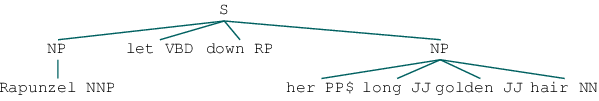

In [6]:
#If a tag pattern matches at overlapping positions, the leftmost match takes precedence.
result

In [7]:
#The opposite of a chunk is a chink. These are patterns you want to match
#to exclude from chunks
grammar = r"""
            NP:
            {<.*>+}    #chunk everything
            }<VBD|IN>{ #chink sequences of VBD and IN
"""
sentence = [("the", "DT"), ("little", "JJ"), ("yellow", "JJ"),
            ("dog", "NN"), ("barked", "VBD"), ("at", "IN"), ("the", "DT"), ("cat", "NN")]
cp = nltk.RegexpParser(grammar)
result = cp.parse(sentence)
print(result)

(S
  (NP the/DT little/JJ yellow/JJ dog/NN)
  barked/VBD
  at/IN
  (NP the/DT cat/NN))


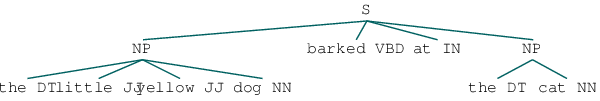

In [8]:
result

In [9]:
#Chunk structures can also be represnted by tags. In the IOB tag example, each token
#is represented as I (Inside), O(Outside) or B (Begin)